In [136]:
import requests
import pandas as pd
from typing import List, Dict
from matplotlib import pyplot as pl
%matplotlib notebook

In [137]:
BASE_URL = "https://perf.ghc.haskell.org/db"

In [166]:
class QueryError(Exception):
    def __init__(self, error, table, params):
        self.error = error
        self.table = table
        self.params = params

def query(table: str, params: Dict[str,str]):
    resp = requests.get(f'{BASE_URL}/{table}', params=params)
    if resp.status_code == 200:
        return pd.DataFrame(resp.json())
    else:
        raise QueryError(resp.json(), table, params)

def get_results(params: Dict[str,str]):
    d = query('results_view', params)
    d['commit_date'] = pd.to_datetime(d['commit_date'])
    return d

In [167]:
def all_test_names() -> List[str]:
    return query('tests', {})['test_name']

test_names = all_test_names()

In [187]:
def plot_tests(test_names: List[str], test_env: str, plot_args={}):
    d = get_results({
        'test_name': 'in.(' + ','.join(test_names) + ')',
        'test_env': f'eq.{test_env}',
        'order': 'commit_date.asc',
        'limit': 20000
    })
    e = d.groupby('test_name')
    e.plot(x='commit_date', y='result_value', **plot_args)
    pl.xlabel(pl.gca().get_xlabel(), rotation=90)

In [188]:
d = get_results({
    'test_name': 'like.*T12425*',
    'order': 'commit_date.asc',
    'test_env': 'eq.x86_64-darwin',
    'limit': 20000
})
d;

<IPython.core.display.Javascript object>


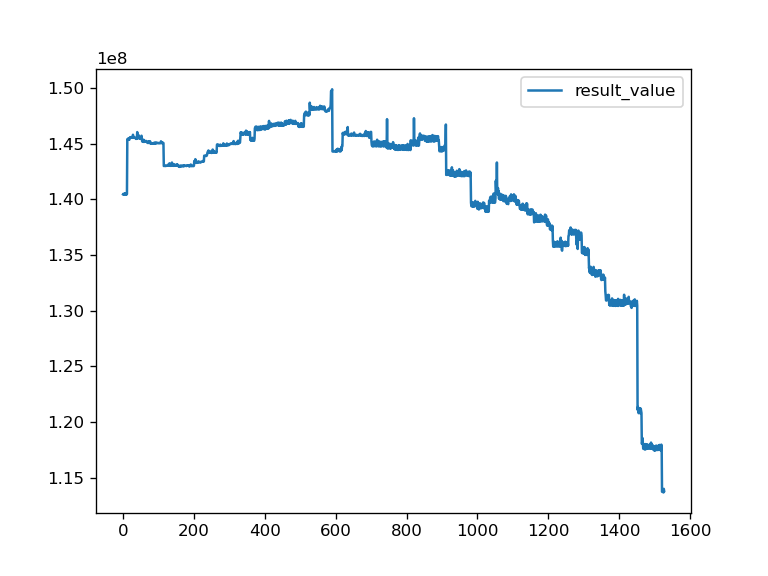

<AxesSubplot:>

In [189]:
d.plot(y='result_value')

<IPython.core.display.Javascript object>


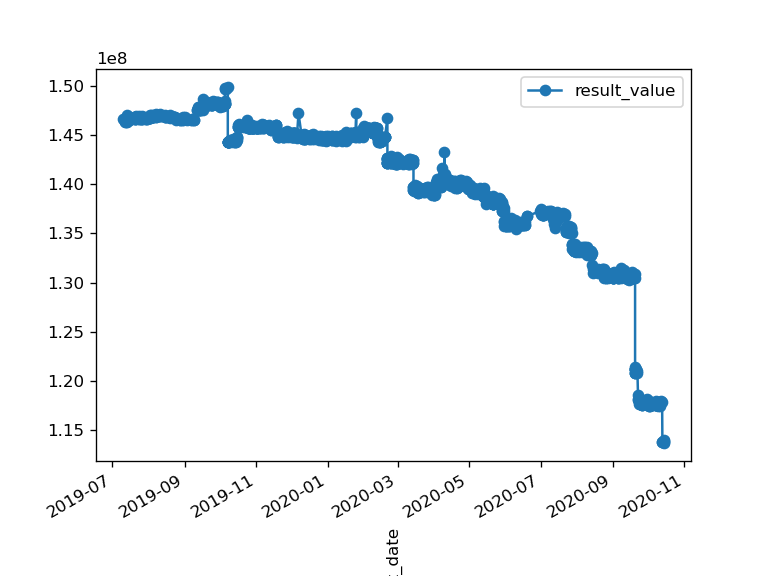

In [196]:
plot_tests(test_names=['compile_time/bytes allocated/T12425/optasm'],
           test_env='x86_64-darwin',
           plot_args={'marker': 'o'})

<IPython.core.display.Javascript object>


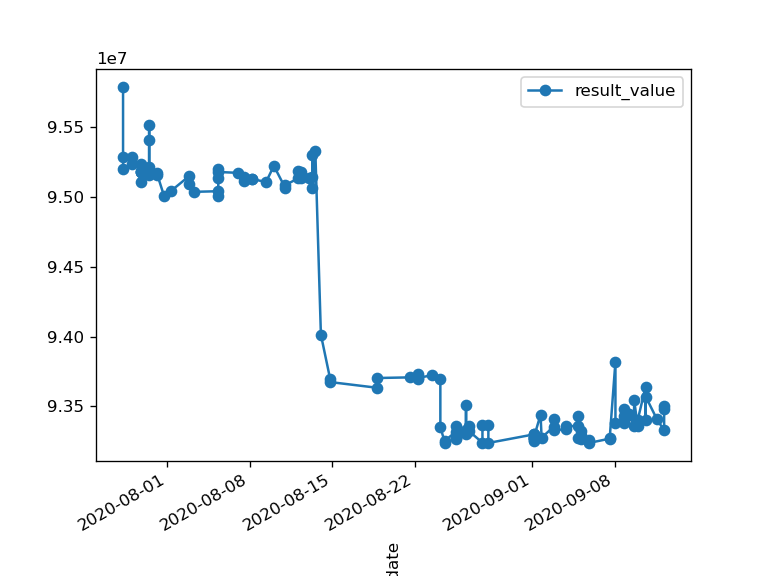

In [201]:
plot_tests(test_names=['compile_time/bytes allocated/T10421a/normal'],
           test_env='"x86_64-linux-deb9-hadrian"',
           plot_args={'marker': 'o'})

In [179]:
d['commit_date']

0      2019-02-16 06:07:53+00:00
1      2019-02-16 06:14:00+00:00
2      2019-02-16 14:10:23+00:00
3      2019-02-16 14:16:32+00:00
4      2019-02-16 14:22:38+00:00
                  ...           
1523   2020-10-13 10:05:49+00:00
1524   2020-10-14 07:42:50+00:00
1525   2020-10-14 16:03:57+00:00
1526   2020-10-14 16:04:34+00:00
1527   2020-10-14 16:05:11+00:00
Name: commit_date, Length: 1528, dtype: datetime64[ns, UTC]

In [199]:
query('tests_view', {'test_name': 'like.*T10421a*'})

,test_id,test_name,test_env_id,test_env_name,count
0,838860558,compile_time/bytes allocated/T10421a,35009309,"""x86_64-linux-deb9-hadrian""",118
1,838860558,compile_time/bytes allocated/T10421a,35009310,"""x86_64-linux-deb9-unreg-hadrian""",115
2,838860558,compile_time/bytes allocated/T10421a,35009311,armv7-linux-deb9,44
3,838860558,compile_time/bytes allocated/T10421a,35009312,i386-linux-deb9,222
4,838860558,compile_time/bytes allocated/T10421a,35009313,x86_64-darwin,212
5,838860558,compile_time/bytes allocated/T10421a,35009315,x86_64-linux-deb9-dwarf,223
6,838860558,compile_time/bytes allocated/T10421a,35009316,x86_64-linux-deb9-integer-simple-validate,223
7,838860558,compile_time/bytes allocated/T10421a,35009317,x86_64-linux-fedora27,223
8,838860558,compile_time/bytes allocated/T10421a,35009329,x86_64-linux-deb9,53
9,838860558,compile_time/bytes allocated/T10421a,35009331,x86_64-linux-deb9-integer-simple,52


In [198]:
get_results({'test_env': 'eq.x86_64-darwin',
             'test_name': 'like.*T10421a*'})

,commit_sha,commit_date,commit_title,commit_id,branch_name,branch_id,sequence_n,test_env,test_name,test_env_id,test_id,result_value
0,0c4bfed849d454bee707fcb2989eb7c6339eaedb,2020-10-14 22:07:25+00:00,users-guide: Add missing :ghc-flag: directive,41990027,master,1,0,x86_64-darwin,compile_time/bytes allocated/T10421a/normal,35009313,836875667,89974736
1,15d2340cb9dc833adb87784e6de86dba235290f7,2020-10-14 22:06:48+00:00,Fix some missed opportunities for preInlineUnc...,41990028,master,1,-1,x86_64-darwin,compile_time/bytes allocated/T10421a/normal,35009313,836875667,90302760
2,e60ae8a38394370fd8818ad004a101466fc7d2dc,2020-10-14 22:06:12+00:00,"Add -Wnoncanonical-{monad,monoid}-instances to...",41990029,master,1,-2,x86_64-darwin,compile_time/bytes allocated/T10421a/normal,35009313,836875667,89953376
3,bf2411a3c198cb2df93a9e0aa0c3b8297f47058d,2020-10-14 16:05:11+00:00,Fix PostfixOperators (#18151),41821570,master,1,-3,x86_64-darwin,compile_time/bytes allocated/T10421a/normal,35009313,836875667,90033216
4,bf2411a3c198cb2df93a9e0aa0c3b8297f47058d,2020-10-14 16:05:11+00:00,Fix PostfixOperators (#18151),41821570,master,1,-3,x86_64-darwin,compile_time/bytes allocated/T10421a,35009313,838860558,90033216
...,...,...,...,...,...,...,...,...,...,...,...,...
422,f305bbfd0d7afee8fe7464252fbfc167205220ae,2020-07-28 06:03:02+00:00,config: Fix Haskell platform constructor w/ pa...,12735522,master,1,-384,x86_64-darwin,compile_time/bytes allocated/T10421a,35009313,838860558,95767104
423,6ee07b494ddd0131d53ea2fd6a4bb29cd05f4dd8,2020-07-28 06:02:27+00:00,Bignum: add support for negative shifts (fix #...,12735523,master,1,-385,x86_64-darwin,compile_time/bytes allocated/T10421a/normal,35009313,836875667,95361512
424,6ee07b494ddd0131d53ea2fd6a4bb29cd05f4dd8,2020-07-28 06:02:27+00:00,Bignum: add support for negative shifts (fix #...,12735523,master,1,-385,x86_64-darwin,compile_time/bytes allocated/T10421a,35009313,838860558,95361512
425,0bd60059b0edfee9e8f66c6817257bbb946656cd,2020-07-28 06:01:49+00:00,This patch addresses the exponential blow-up i...,12735524,master,1,-386,x86_64-darwin,compile_time/bytes allocated/T10421a/normal,35009313,836875667,95896552
